### IMPORTS

In [1]:
from Inference import BBVI 
import torch
import matplotlib.pyplot as plt

### EXAMPLE

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
# load data
data = torch.load('Data/foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [4]:
Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=30, nb_layers=2, device=device)

In [5]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.5}

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 3, 'factor': 0.8}

In [6]:
voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params)

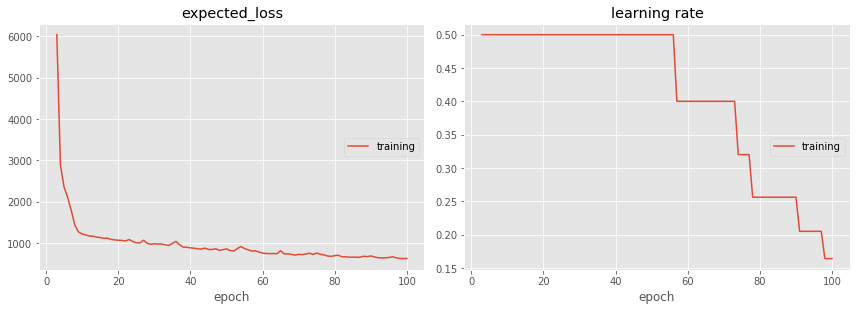

expected_loss:
training   (min:  620.308, max: 562310.188, cur:  623.416)

learning rate:
training   (min:    0.164, max:    0.500, cur:    0.164)


In [7]:
Net = voptimizer.run((x_data,y_data), n_epoch=100, n_iter=20, n_ELBO_samples=20, plot=True)

In [9]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)

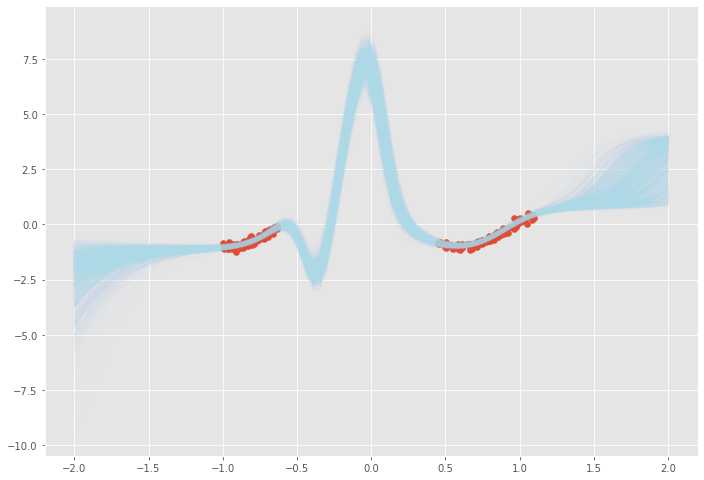

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.sample_parameters()

    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')

In [19]:
data_validation = torch.load('Data/foong_data_validation.pt')
x_data_validation = data_validation[0].to(device)
y_data_validation = data_validation[1].to(device)
y_data_validation = y_data_validation.unsqueeze(-1)

In [35]:
Net.sample_parameters(M=997)

([tensor([[[ 1.2968],
           [-0.1936],
           [-3.4265],
           ...,
           [ 0.1126],
           [-1.8260],
           [-0.1844]],
  
          [[ 2.3028],
           [-0.1789],
           [-3.5260],
           ...,
           [ 0.0108],
           [-2.9093],
           [ 0.0344]],
  
          [[ 0.8855],
           [ 0.0452],
           [-3.6479],
           ...,
           [-0.2145],
           [-0.7236],
           [ 0.3917]],
  
          ...,
  
          [[ 0.6166],
           [ 0.1201],
           [-3.8511],
           ...,
           [-0.3672],
           [-0.1386],
           [ 0.0050]],
  
          [[ 2.1070],
           [-0.2411],
           [-3.6625],
           ...,
           [ 0.3996],
           [-2.0657],
           [-0.1056]],
  
          [[ 4.6394],
           [-0.0932],
           [-3.6069],
           ...,
           [-0.1859],
           [-1.9660],
           [ 0.5106]]], grad_fn=<AddBackward0>),
  tensor([[[ 0.0064,  1.0768, -1.7269,  ...,  1

In [36]:
y_pred_validation = Net.forward(x_data_validation)

In [37]:
y_pred_validation.shape

torch.Size([997, 2000, 1])

In [38]:
LL = Net._log_norm(y_pred_validation, y_data_validation, torch.tensor(0.1).to(device))

In [41]:
LL.sum(dim=[1,2]).shape

torch.Size([997])

In [42]:
LL.sum(dim=[1,2]).mean()

tensor(1339.1265, grad_fn=<MeanBackward0>)

In [81]:
Net.compute_elbo(x_data, y_data, n_samples_ELBO=100000, sigma_noise=0.1, device=device)

tensor(627.2961, grad_fn=<DivBackward0>)